### Task 1 - preliminary data processing

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
sns.set_style("whitegrid")
pd.options.display.max_colwidth = 18
pd.options.display.max_columns = 50

In [116]:
card_openings = pd.read_csv('card_openings.csv')
card_openings

,cust_id,open_dt,contact_dt
0,2537ec14c2e5b8...,2021-08-19,2021-08-12
1,b6bc9799397f07...,2021-08-16,2021-08-13
2,d09ee17e668f22...,2021-08-21,2021-08-13
3,2323b4ae10e99e...,2021-08-23,2021-08-13
4,b056b9822c2208...,2021-08-23,2021-08-13
...,...,...,...
22990,f6b65467d1194e...,2021-08-16,2021-08-12
22991,3b7fff60c9a471...,2021-08-17,2021-08-12
22992,a2948d4605a1a1...,2021-08-23,2021-08-13
22993,8b7aa89d178880...,2021-08-14,2021-08-13


In [117]:
print(f'Number of Na: \n{card_openings.isna().sum()}\n')
print(f'Number of unique values in atribute: \n{card_openings.nunique()}\n')
print(f'Number of non unique values in atribute: \n{card_openings.shape[0] - card_openings.nunique()}\n')
print(f'Number of rows: \n{card_openings.shape[0]}\n')


print(f'Number of duplicate rows: \n{card_openings[card_openings.duplicated()].shape[0]}')

Number of Na: 
cust_id       0
open_dt       0
contact_dt    0
dtype: int64

Number of unique values in atribute: 
cust_id       21424
open_dt          21
contact_dt       15
dtype: int64

Number of non unique values in atribute: 
cust_id        1571
open_dt       22974
contact_dt    22980
dtype: int64

Number of rows: 
22995

Number of duplicate rows: 
0


In [118]:
## We can see that customer can open card multiple times, but contact only once
card_openings[card_openings['cust_id'] == card_openings[card_openings.duplicated('cust_id')].iloc[0][0]]

/var/folders/y2/kyj4l2mn1794yrxqmgvvg4580000gn/T/ipykernel_56643/1151259003.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  card_openings[card_openings['cust_id'] == card_openings[card_openings.duplicated('cust_id')].iloc[0][0]]


,cust_id,open_dt,contact_dt
301,9c8981551ab720...,2021-08-25,2021-08-13
960,9c8981551ab720...,2021-08-13,2021-08-13


In [119]:
min_open_dt = card_openings.groupby(['cust_id', 'contact_dt'])['open_dt'].min().reset_index()
min_open_dt = min_open_dt.groupby(['cust_id','open_dt'])['contact_dt'].min().reset_index()
print(f'Number of Na: \n{min_open_dt.isna().sum()}\n')
print(f'Number of unique values in atribute: \n{min_open_dt.nunique()}\n')
print(f'Number of non unique values in atribute: \n{min_open_dt.shape[0] - min_open_dt.nunique()}\n')
print(f'Number of rows: \n{min_open_dt.shape[0]}\n')


print(f'Number of duplicate rows: \n{min_open_dt[min_open_dt.duplicated()].shape[0]}')

few_contacts = min_open_dt[min_open_dt.duplicated('cust_id')].iloc[5][0]
## Non unique values becasue few contactdt
min_open_dt[min_open_dt['cust_id'] == few_contacts]

Number of Na: 
cust_id       0
open_dt       0
contact_dt    0
dtype: int64

Number of unique values in atribute: 
cust_id       21424
open_dt          21
contact_dt       15
dtype: int64

Number of non unique values in atribute: 
cust_id           7
open_dt       21410
contact_dt    21416
dtype: int64

Number of rows: 
21431

Number of duplicate rows: 
0


/var/folders/y2/kyj4l2mn1794yrxqmgvvg4580000gn/T/ipykernel_56643/4019007103.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  few_contacts = min_open_dt[min_open_dt.duplicated('cust_id')].iloc[5][0]


,cust_id,open_dt,contact_dt
18115,d842cd3390f73f...,2021-08-21,2021-08-13
18116,d842cd3390f73f...,2021-08-24,2021-08-12


In [120]:
visa_communications = pd.read_csv('visa_communications.csv')
visa_communications
print(f'Number of Na: \n{visa_communications.isna().sum()}\n')
print(f'Number of unique values in atribute: \n{visa_communications.nunique()}\n')
print(f'Number of non unique values in atribute: \n{visa_communications.shape[0] - visa_communications.nunique()}\n')
print(f'Number of rows: \n{visa_communications.shape[0]}\n')


print(f'Number of duplicate rows: \n{visa_communications[visa_communications.duplicated()].shape[0]}')

Number of Na: 
channel_type         0
contact_dt           0
control_group_flg    0
sent                 0
delivered            0
opened               0
clicked              0
blocked              0
cust_id              0
dtype: int64

Number of unique values in atribute: 
channel_type               3
contact_dt                15
control_group_flg          2
sent                       2
delivered                  2
opened                     2
clicked                    2
blocked                    2
cust_id              1401168
dtype: int64

Number of non unique values in atribute: 
channel_type         1456823
contact_dt           1456811
control_group_flg    1456824
sent                 1456824
delivered            1456824
opened               1456824
clicked              1456824
blocked              1456824
cust_id                55658
dtype: int64

Number of rows: 
1456826

Number of duplicate rows: 
0


In [135]:
merged_participated_group = pd.merge(visa_communications, min_open_dt, on = ['cust_id', 'contact_dt'], how = 'inner')
merged_participated_group

,channel_type,contact_dt,control_group_flg,sent,delivered,opened,clicked,blocked,cust_id,open_dt
0,PUSH,2021-08-12,0,0,0,0,0,0,2823d67a9a2e42...,2021-08-12
1,PUSH,2021-08-12,1,0,0,0,0,0,fde03d3d2a3b14...,2021-08-24
2,PUSH,2021-08-12,0,0,0,0,0,0,4790e99c042e38...,2021-08-18
3,EMAIL,2021-08-12,0,1,1,1,0,0,f1b6e14260e2f7...,2021-08-20
4,EMAIL,2021-08-13,0,1,1,0,0,0,3bf6dc99ff2f29...,2021-08-20
...,...,...,...,...,...,...,...,...,...,...
22027,EMAIL,2021-08-12,0,1,1,0,0,0,77d9e39b32c954...,2021-08-13
22028,EMAIL,2021-08-12,0,1,1,0,0,0,199b60807bae69...,2021-08-25
22029,PUSH,2021-08-12,0,0,0,0,0,0,893802f26670a8...,2021-08-26
22030,PUSH,2021-08-12,0,0,0,0,0,0,020d85399e4703...,2021-08-12


In [123]:
visa_transactions = pd.read_csv('visa_transactions.csv')
print(f'Number of Na: \n{visa_transactions.isna().sum()}\n')
print(f'Number of unique values in atribute: \n{visa_transactions.nunique()}\n')
print(f'Number of non unique values in atribute: \n{visa_transactions.shape[0] - visa_transactions.nunique()}\n')
print(f'Number of rows: \n{visa_transactions.shape[0]}\n')


print(f'Number of duplicate rows: \n{visa_transactions[visa_transactions.duplicated()].shape[0]}')
visa_transactions.head()


Number of Na: 
cust_id           0
transaction_dt    0
mcc_id            0
txn_sum           0
dtype: int64

Number of unique values in atribute: 
cust_id           13090
transaction_dt       34
mcc_id              255
txn_sum           74648
dtype: int64

Number of non unique values in atribute: 
cust_id           383474
transaction_dt    396530
mcc_id            396309
txn_sum           321916
dtype: int64

Number of rows: 
396564

Number of duplicate rows: 
0


,cust_id,transaction_dt,mcc_id,txn_sum
0,db5e62076fad27...,2021-09-09,5399,2322.00
1,9fc01d326a0adc...,2021-09-07,5533,1245.00
2,7afcb430aaf9ba...,2021-08-30,5921,29.99
3,79a2d16cd93c5d...,2021-09-04,5211,110.00
4,0c10b18ba26cb5...,2021-08-31,5441,45.00


In [125]:
visa_transactions_agg = visa_transactions.groupby('cust_id')['txn_sum'].sum().reset_index()
visa_transactions_agg

,cust_id,txn_sum
0,0000d77b0a84fa...,6081.48
1,0001f693f461c4...,5748.05
2,000238bd9e5c9d...,27452.33
3,00069a7fd6ef17...,2046.41
4,000cbe1948c995...,107950.36
...,...,...
13085,ffd9f93cee686e...,11492.17
13086,ffda7e8035d4f6...,5811.39
13087,ffdb811c17ffd9...,901.04
13088,fff0c9476a7f1e...,15993.94


In [136]:
merged_participated_group_agg = pd.merge(merged_participated_group, visa_transactions_agg, on = 'cust_id', how='inner')
merged_participated_group_agg.head()

print(f'Number of Na: \n{merged_participated_group_agg.isna().sum()}\n')
print(f'Number of unique values in atribute: \n{merged_participated_group_agg.nunique()}\n')
print(f'Number of non unique values in atribute: \n{merged_participated_group_agg.shape[0] - merged_participated_group.nunique()}\n')
print(f'Number of rows: \n{merged_participated_group_agg.shape[0]}\n')


print(f'Number of duplicate rows: \n{merged_participated_group_agg[merged_participated_group_agg.duplicated()].shape[0]}')

Number of Na: 
channel_type         0
contact_dt           0
control_group_flg    0
sent                 0
delivered            0
opened               0
clicked              0
blocked              0
cust_id              0
open_dt              0
txn_sum              0
dtype: int64

Number of unique values in atribute: 
channel_type             3
contact_dt              13
control_group_flg        2
sent                     2
delivered                2
opened                   2
clicked                  2
blocked                  1
cust_id              13090
open_dt                 19
txn_sum              12656
dtype: int64

Number of non unique values in atribute: 
channel_type         13466
contact_dt           13454
control_group_flg    13467
sent                 13467
delivered            13467
opened               13467
clicked              13467
blocked              13468
cust_id              -7955
open_dt              13448
dtype: int64

Number of rows: 
13469

Number of duplicate

In [ ]:
card_openings_non_participants = pd.read_csv('card_openings_non_participants.csv')
visa_transactions_non_particip = pd.read_csv('visa_transactions_non_particip.csv')

min_open_non_participants_dt = card_openings_non_participants.groupby(['cust_id', 'contact_dt'])['open_dt'].min().reset_index()
min_open_non_participants_dt = min_open_dt.groupby(['cust_id','open_dt'])['contact_dt'].min().reset_index()

merged_non_participated_group = pd.merge(visa_communications, min_open_non_participants_dt, on = ['cust_id', 'contact_dt'], how = 'inner')
merged_non_participated_group

visa_transactions_non_agg = visa_transactions_non_particip.groupby('cust_id')['txn_sum'].sum().reset_index()
visa_transactions_non_agg

### Task2 Selection of KPI
  1) Profit = Bank commission - cashbacks (if applicable)
  
  2) CTR rate: Open rate; Click rate


In [ ]:
# Calculate the open  rate for each channel
open_rates = visa_communications.groupby('channel_type').apply(
    lambda x: x['opened'].sum() / x['delivered'].sum() if x['delivered'].sum() > 0 else 0
)
open_rates

C:\Users\Bogdan\AppData\Local\Temp\ipykernel_23296\2890624910.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  open_rates = visa_communications_df.groupby('channel_type').apply(


channel_type
EMAIL    0.102413
PUSH     0.000000
Popup    0.996165
dtype: float64

In [23]:
# Calculate the overall open conversion rate
total_opened = visa_communications_df['opened'].sum()
total_delivered = visa_communications_df['delivered'].sum()
overall_open_rate = total_opened / total_delivered if total_delivered > 0 else 0

# Display the overall conversion rate
print("Overall open Rate:", round(overall_open_rate, 3))

Overall open Rate: 0.402


In [24]:
# Calculate the click rate for each channel
conversion_rates = visa_communications_df.groupby('channel_type').apply(
    lambda x: x['clicked'].sum() / x['delivered'].sum() if x['delivered'].sum() > 0 else 0
)
print(conversion_rates)

channel_type
EMAIL    0.006040
PUSH     0.000000
Popup    0.080311
dtype: float64


C:\Users\Bogdan\AppData\Local\Temp\ipykernel_23296\1564165469.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  conversion_rates = visa_communications_df.groupby('channel_type').apply(


In [25]:
# Calculate the overall click rate
total_clicked = visa_communications_df['clicked'].sum()
total_delivered = visa_communications_df['delivered'].sum()
overall_click_rate = total_clicked / total_delivered if total_delivered > 0 else 0

# Display the overall click rate
print("Overall click Rate:", overall_click_rate)

Overall click Rate: 0.03093907799062114


In [26]:
# Calculate the click to open rate for each channel
conversion_rates = visa_communications_df.groupby('channel_type').apply(
    lambda x: x['clicked'].sum() / x['opened'].sum() if x['delivered'].sum() > 0 else 0
)
print(conversion_rates)

channel_type
EMAIL    0.058973
PUSH     0.000000
Popup    0.080620
dtype: float64


C:\Users\Bogdan\AppData\Local\Temp\ipykernel_23296\3978785585.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  conversion_rates = visa_communications_df.groupby('channel_type').apply(


In [27]:
# Calculate the overall click to open rate
total_clicked = visa_communications_df['clicked'].sum()
total_opened = visa_communications_df['opened'].sum()
overall_open_rate = total_clicked / total_opened if total_opened > 0 else 0

# Display the overall open rate
print("Overall open Rate:", overall_open_rate)

Overall open Rate: 0.07695437556182876


### Task 3 : Marketing funnel

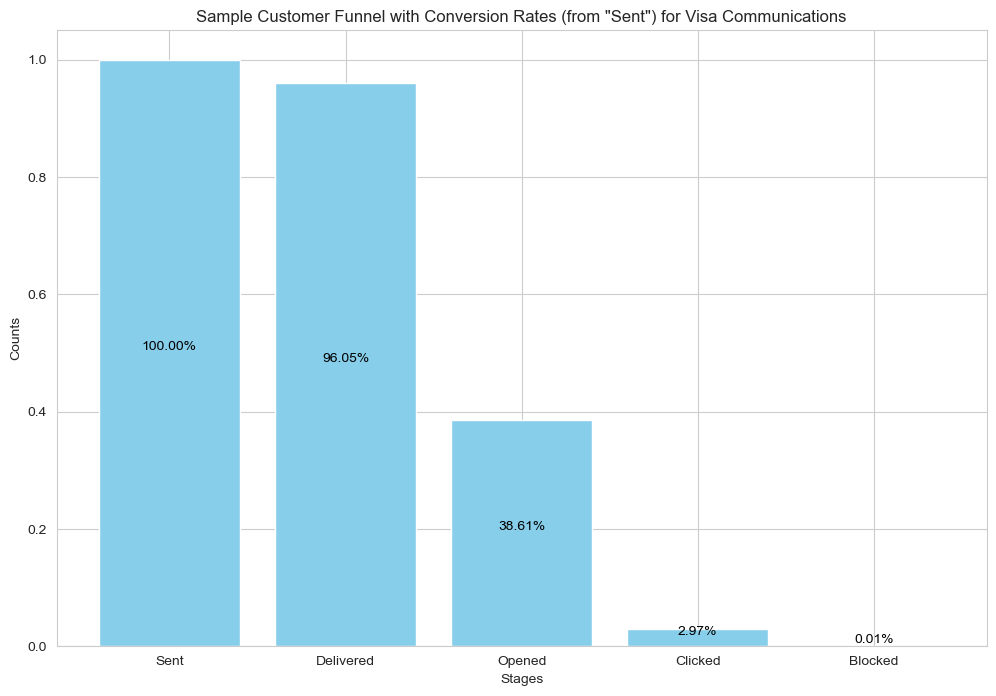

In [28]:
# ploting the overall marketing funnel (without channel detailization)
import matplotlib.pyplot as plt

# Calculate the conversion rates from the 'sent' stage
conversion_rates = {
    'Sent': 1,  # Conversion rate from 'sent' to 'sent' is always 100%
    'Delivered': visa_communications_df['delivered'].sum() / visa_communications_df['sent'].sum(),
    'Opened': visa_communications_df['opened'].sum() / visa_communications_df['sent'].sum(),
    'Clicked': visa_communications_df['clicked'].sum() / visa_communications_df['sent'].sum(),
    'Blocked': visa_communications_df['blocked'].sum() / visa_communications_df['sent'].sum()
}

# Plotting the funnel with conversion rates
stages = list(conversion_rates.keys())
counts = list(conversion_rates.values())
conversion_rates_values = list(conversion_rates.values())

plt.figure(figsize=(12, 8))
plt.bar(stages, counts, color='skyblue')

# Adding conversion rate labels
for i in range(len(stages)):
    plt.text(i, counts[i] / 2, f'{conversion_rates_values[i]:.2%}', ha='center', va='bottom', color='black')

plt.xlabel('Stages')
plt.ylabel('Counts')
plt.title('Sample Customer Funnel with Conversion Rates (from "Sent") for Visa Communications')
plt.show()

In [35]:
funnel_data = visa_communications_df.groupby('channel_type').agg({
    'sent': 'sum',      
    'delivered': 'sum',   
    'opened': 'sum',      
    'clicked': 'sum',     
    'blocked': 'sum'     
})
funnel_data

,sent,delivered,opened,clicked,blocked
channel_type,,,,,
EMAIL,524209,524209,53686,3166,101
PUSH,0,0,0,0,0
Popup,296842,264373,263359,21232,0


C:\Users\Bogdan\AppData\Local\Temp\ipykernel_23296\931153720.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(funnel_data.columns, rotation=45)
C:\Users\Bogdan\AppData\Local\Temp\ipykernel_23296\931153720.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(funnel_data.columns, rotation=45)
C:\Users\Bogdan\AppData\Local\Temp\ipykernel_23296\931153720.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(funnel_data.columns, rotation=45)


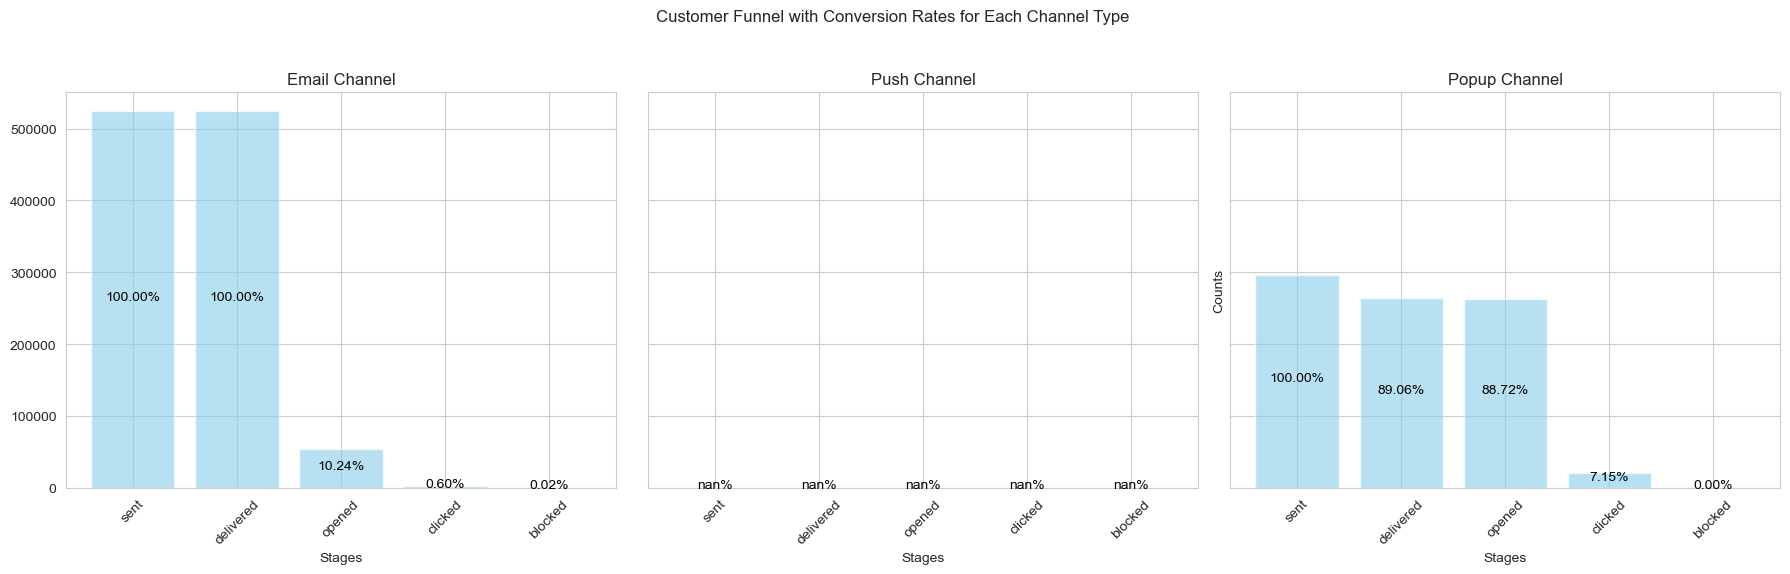

In [84]:

# Using the previously created sample data
# Calculating conversion rates from 'sent' for each stage
conversion_data = funnel_data.copy()
for stage in conversion_data.columns:
    conversion_data[stage] = conversion_data[stage] / funnel_data['sent']

# Plotting the funnel with conversion rates for each channel
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
channels = funnel_data.index

for i, channel in enumerate(channels):
    # Plotting counts
    axes[i].bar(funnel_data.columns, funnel_data.loc[channel], color='skyblue', alpha=0.6, label='Counts')

    # Adding conversion rate labels
    for j, stage in enumerate(funnel_data.columns):
        conversion_rate = conversion_data.loc[channel, stage]
        axes[i].text(j, funnel_data.loc[channel, stage] / 2, f'{conversion_rate:.2%}', ha='center', color='black')

    axes[i].set_title(f'{channel.capitalize()} Channel')
    axes[i].set_xlabel('Stages')
    axes[i].set_xticklabels(funnel_data.columns, rotation=45)

plt.suptitle('Customer Funnel with Conversion Rates for Each Channel Type ')
plt.ylabel('Counts')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



### Task 4.1 : financial effect

In [37]:

## calculate the 1% bank commission from control group transaction amount

# Calculate the total sum of all transactions
total_control_revenue = merged_control_group['txn_sum'].sum()

# Calculate the bank's commission (1% of the total sum)
bank_commission = 0.01 * total_control_revenue

# Display the results
print("Total Sum of Transactions:", total_control_revenue)
print("Bank's Commission (1%):", bank_commission)



Total Sum of Transactions: 427352337.33
Bank's Commission (1%): 4273523.3733


In [38]:
control_group_revenue = total_control_revenue
control_group_revenue

427352337.33

In [39]:
## calculate the financial effect for test group

test_group_financial = pd.merge(visa_transactions_df , visa_communications_df, on='cust_id', how='inner')
test_group_financial

# Convert date columns to datetime format if they are not already
test_group_financial['contact_dt'] = pd.to_datetime(test_group_financial['contact_dt'])
test_group_financial['transaction_dt'] = pd.to_datetime(test_group_financial['transaction_dt'])

# Calculate the difference in days between contact_dt and transaction_dt
test_group_financial['date_diff'] = (test_group_financial['transaction_dt'] - test_group_financial['contact_dt']).dt.days

In [40]:
# Create a new column 'txn_500' to indicate if txn_sum is above 500
test_group_financial['txn_500'] = test_group_financial['txn_sum'] > 500

In [41]:
# Define a function to check cashback eligibility for each customer group
def check_cashback_eligibility(group):
    # Filter transactions where date_diff <= 14 and txn_500 is True
    eligible_transactions = group[(group['date_diff'] <= 14) & (group['txn_500'])]
    # Check if the frequency of such transactions is 3 or more
    return len(eligible_transactions) >= 3

# Apply the function to each customer group
cashback_eligibility = test_group_financial.groupby('cust_id').apply(check_cashback_eligibility)
# Map the results back to the original DataFrame
test_group_financial['cashback_eligible'] = test_group_financial['cust_id'].map(cashback_eligibility)


C:\Users\Bogdan\AppData\Local\Temp\ipykernel_23296\2661537503.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cashback_eligibility = test_group_financial.groupby('cust_id').apply(check_cashback_eligibility)


In [ ]:
# Create 'eligible_sum' column
test_group_financial['eligible_sum'] = test_group_financial.apply(lambda row: row['txn_sum'] if row['cashback_eligible'] else 0, axis=1)

# Create 'cashback_sum' column
test_group_financial['cashback_sum'] = 0.05 * test_group_financial['eligible_sum']

test_group_financial

,cust_id,transaction_dt,mcc_id,txn_sum,channel_type,contact_dt,control_group_flg,sent,delivered,opened,clicked,blocked,date_diff,txn_500,cashback_eligible,eligible_sum,cashback_sum
0,db5e62076fad27...,2021-09-09,5399,2322.00,PUSH,2021-08-12,1,0,0,0,0,0,28,True,True,2322.00,116.100
1,db5e62076fad27...,2021-09-02,5541,1499.98,PUSH,2021-08-12,1,0,0,0,0,0,21,True,True,1499.98,74.999
2,db5e62076fad27...,2021-09-15,5399,2010.00,PUSH,2021-08-12,1,0,0,0,0,0,34,True,True,2010.00,100.500
3,db5e62076fad27...,2021-08-28,5499,476.00,PUSH,2021-08-12,1,0,0,0,0,0,16,False,True,476.00,23.800
4,db5e62076fad27...,2021-08-30,5399,2536.00,PUSH,2021-08-12,1,0,0,0,0,0,18,True,True,2536.00,126.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422023,bfd06350e20bf9...,2021-08-29,5541,999.89,PUSH,2021-08-12,0,0,0,0,0,0,17,True,False,0.00,0.000
422024,258e37b4b396d0...,2021-08-30,7999,792.60,PUSH,2021-08-12,0,0,0,0,0,0,18,True,False,0.00,0.000
422025,68696e369dd5a6...,2021-08-26,5812,106.00,EMAIL,2021-08-12,0,1,1,1,0,0,14,False,False,0.00,0.000
422026,ce21285f89fb0e...,2021-09-15,5691,3699.00,PUSH,2021-08-12,0,0,0,0,0,0,34,True,False,0.00,0.000


In [42]:
# create a dataframe only cashback-eligible transactions are shown
cashback_eligible_df = test_group_financial[test_group_financial['cashback_eligible']]

cashback_eligible_df

,cust_id,transaction_dt,mcc_id,txn_sum,channel_type,contact_dt,control_group_flg,sent,delivered,opened,clicked,blocked,date_diff,txn_500,cashback_eligible
0,db5e62076fad27...,2021-09-09,5399,2322.00,PUSH,2021-08-12,1,0,0,0,0,0,28,True,True
1,9fc01d326a0adc...,2021-09-07,5533,1245.00,PUSH,2021-08-12,0,0,0,0,0,0,26,True,True
2,7afcb430aaf9ba...,2021-08-30,5921,29.99,PUSH,2021-08-12,0,0,0,0,0,0,18,False,True
8,ec1acb6ccaaf88...,2021-08-22,5977,687.00,EMAIL,2021-08-12,0,1,1,0,0,0,10,True,True
9,d33ced03426b62...,2021-08-28,4722,36360.00,PUSH,2021-08-12,0,0,0,0,0,0,16,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422015,e16c936dabdcf9...,2021-08-28,5541,1899.20,EMAIL,2021-08-13,0,1,1,0,0,0,15,True,True
422016,e16c936dabdcf9...,2021-08-28,5541,1899.20,PUSH,2021-08-12,0,0,0,0,0,0,16,True,True
422017,f2cc6283683a1f...,2021-09-15,5411,56.00,PUSH,2021-08-12,0,0,0,0,0,0,34,False,True
422018,077ad2952cd593...,2021-09-14,5814,299.98,PUSH,2021-08-12,0,0,0,0,0,0,33,False,True


In [85]:
# Function to calculate cashback
def calculate_cashback(row):
    if row['cashback_eligible']:
        eligible_period = row['transaction_dt'] > row['contact_dt'] + pd.Timedelta(days=14)
        if eligible_period:
            return 0.05 * row['txn_sum']
    return 0

# Apply the function to calculate cashback
test_group_financial['cashback_sum'] = test_group_financial.apply(calculate_cashback, axis=1)

# Calculate total cashback
total_cashback = test_group_financial['cashback_sum'].sum()
total_cashback_sum_str = "Total_cashback_sum is " + str(total_cashback)
total_cashback_sum_str

'Total_cashback_sum is 5599846.260000001'

In [86]:
# Calculate total sum of transactions
total_sum_of_transactions = test_group_financial['txn_sum'].sum()
total_sum_of_transactions

# Calculate bank commission (1% of total sum of transactions)
bank_commission = 0.01 * total_sum_of_transactions
bank_commission
total_bank_commission_str = "Total_bank_commision_ is " + str(bank_commission)
total_bank_commission_str



'Total_bank_commision_ is 3386065.3003'

In [87]:
total_cashback_sum_str = "Total_cashback_sum is " + str(total_cashback)
total_cashback_sum_str

'Total_cashback_sum is 5599846.260000001'

In [88]:
bank_profit = bank_commission - total_cashback
total_bank_profit_str = "Total_bank_profit_ is " + str(bank_profit)
total_bank_profit_str

'Total_bank_profit_ is -2213780.959700001'

###Task 4.2: check for significance in differnce

In [47]:
## calculate AOV in control gourp

total_txn_sum = merged_control_group['txn_sum'].sum()
count_txn_sum = merged_control_group['txn_sum'].count()
control_AOV = total_txn_sum / count_txn_sum if count_txn_sum != 0 else 0

# Display the AOV
print("Control group average Order Value (AOV):", control_AOV)

Control group average Order Value (AOV): 786.3055292790721


In [48]:
## calculate AOV in test group

total_txn_sum = merged_test_group['txn_sum'].sum()
count_txn_sum = merged_test_group['txn_sum'].count()
test_AOV = total_txn_sum / count_txn_sum if count_txn_sum != 0 else 0

# Display the AOV
print("Test group average Order Value (AOV):", test_AOV)

Test group average Order Value (AOV): 807.5409818763861


In [49]:

#conduct T-test using order value of control and test group

from scipy import stats


# Conduct t-test
t_statistic, p_value = stats.ttest_ind(merged_test_group['txn_sum'], merged_control_group['txn_sum'])

# Display the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: 0.9481830675508405
P-value: 0.3430365093302282


It is not significance level on 5%

### Task number 5

In [50]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder


In [52]:
synthesis_df = pd.read_csv('features.csv')

(31418100, 7)

In [53]:
synthesis_df.shape

(31418100, 7)

In [54]:
synthesis_df = synthesis_df.drop_duplicates(subset = 'cust_id')

In [55]:
data = pd.DataFrame()

data.index =  synthesis_df.columns
data['count_NaN'] = synthesis_df.isna().sum()
data['dtypes'] = synthesis_df.dtypes
data['uniq'] = synthesis_df.nunique()
data['repeat'] = synthesis_df.shape[0] - data['uniq']
data['shape'] = synthesis_df.shape[0]
data

,count_NaN,dtypes,uniq,repeat,shape
cust_id,0,object,1761298,0,1761298
mnth_gen,0,object,11,1761287,1761298
turnover,0,float64,1535537,225761,1761298
involve_cd,0,int64,4,1761294,1761298
client_segment,0,object,6,1761292,1761298
gender,0,object,4,1761294,1761298
age_gr,1,object,5,1761293,1761298


In [56]:
import random

# Установка количества строк, которое вы хотите сохранить в итоговом датасете
num_rows_to_keep = 100000

# Проверка, что указанное количество строк меньше или равно общему количеству строк в исходном датасете
if num_rows_to_keep <= len(synthesis_df):
    # Случайный выбор указанного количества строк
    random_indices = random.sample(range(len(synthesis_df)), num_rows_to_keep)
    sampled_dataset = synthesis_df.iloc[random_indices]
else:
    print("Указанное количество строк больше, чем общее количество строк в исходном датасете")

synthesis_df = sampled_dataset.copy()

In [57]:
# Объединение учавствовавших в конкурсе
participants = pd.concat([min_open_dt_non['cust_id'], min_open_dt['cust_id']], ignore_index=True)
participants_l = participants.values.tolist()


In [58]:
participant_data = synthesis_df[synthesis_df['cust_id'].isin(participants_l)]
non_participant_data = synthesis_df[~synthesis_df['cust_id'].isin(participants_l)]

In [59]:
columns_of_interest = ['turnover', 'client_segment', 'gender', 'age_gr']
participant_data_subset = participant_data[columns_of_interest]
non_participant_data_subset = non_participant_data[columns_of_interest]

In [60]:
encoder = LabelEncoder()
cat_columns = ['client_segment', 'gender','age_gr']
for col in cat_columns:
    participant_data_subset[col] = encoder.fit_transform(participant_data_subset[col])
for col in cat_columns:
    non_participant_data_subset[col] = encoder.fit_transform(non_participant_data_subset[col])
non_participant_data_subset


C:\Users\Bogdan\AppData\Local\Temp\ipykernel_23296\855745752.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participant_data_subset[col] = encoder.fit_transform(participant_data_subset[col])
C:\Users\Bogdan\AppData\Local\Temp\ipykernel_23296\855745752.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participant_data_subset[col] = encoder.fit_transform(participant_data_subset[col])
C:\Users\Bogdan\AppData\Local\Temp\ipykernel_23296\855745752.py:4: SettingWithCopyWarning: 
A value is trying to be set 

,turnover,client_segment,gender,age_gr
825802,46561.45,0,1,1
1977691,23300.23,1,1,0
1232278,54825.18,1,0,0
1080915,22521.77,0,0,3
736617,82034.40,1,0,1
...,...,...,...,...
195758,181502.39,1,1,0
316912,35905.22,0,0,0
834332,24178.78,0,1,0
2790686,21743.96,1,0,0


In [62]:
columns_to_convert = list(non_participant_data_subset.columns)
# columns_to_convert.remove("turnover")
columns_to_convert

# # Loop through each column and change the data type to int
for col in columns_to_convert:
    non_participant_data_subset[col] = non_participant_data_subset[col].astype(int)
    participant_data_subset[col] = participant_data_subset[col].astype(int)

C:\Users\Bogdan\AppData\Local\Temp\ipykernel_23296\4204164903.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_participant_data_subset[col] = non_participant_data_subset[col].astype(int)
C:\Users\Bogdan\AppData\Local\Temp\ipykernel_23296\4204164903.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participant_data_subset[col] = participant_data_subset[col].astype(int)
C:\Users\Bogdan\AppData\Local\Temp\ipykernel_23296\4204164903.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [63]:
# Align the columns of non_participant_data_encoded with participant_data_encoded
non_participant_data_encoded = participant_data_subset.reindex(columns=participant_data_subset.columns, fill_value=0)

In [64]:
non_participant_data_encoded = non_participant_data_subset.fillna(0)
participant_data_encoded = participant_data_subset.fillna(0)

In [65]:
participant_data_encoded.head()

,turnover,client_segment,gender,age_gr
2313551,12812,0,0,0
610452,11281,1,0,3
1652427,57265,4,2,4
3792866,32018,1,1,0
1004231,145238,2,0,0


In [66]:
data = pd.DataFrame()

data.index =  non_participant_data_subset.columns
data['count_NaN'] = non_participant_data_subset.isna().sum()
data['dtypes'] = non_participant_data_subset.dtypes
data['uniq'] = non_participant_data_subset.nunique()
data['repeat'] = non_participant_data_subset.shape[0] - data['uniq']
data['shape'] = non_participant_data_subset.shape[0]
data

,count_NaN,dtypes,uniq,repeat,shape
turnover,0,int32,54162,43259,97421
client_segment,0,int32,5,97416,97421
gender,0,int32,3,97418,97421
age_gr,0,int32,5,97416,97421


In [67]:
non_participant_data_encoded.shape

(97421, 4)

In [68]:
non_participant_data_encoded

,turnover,client_segment,gender,age_gr
825802,46561,0,1,1
1977691,23300,1,1,0
1232278,54825,1,0,0
1080915,22521,0,0,3
736617,82034,1,0,1
...,...,...,...,...
195758,181502,1,1,0
316912,35905,0,0,0
834332,24178,0,1,0
2790686,21743,1,0,0


In [69]:

# Calculate Euclidean distance between participants and non-participants using PCA-transformed data
# distance_matrix = euclidean_distances(non_participant_data_pca, participant_data_pca)
# similarity_matrix = euclidean_distances(non_participant_data_subset, participant_data_encoded)
similarity_scores = cosine_similarity(non_participant_data_subset, participant_data_encoded)

In [74]:
# Find indices of control group members with highest similarity to each treatment group member
synthetic_control_indices = np.argmax(similarity_scores, axis=1)

# Select the synthetic control group
synthetic_control_group = participant_data_encoded.iloc[synthetic_control_indices]

# Print the synthetic control group
print(synthetic_control_group)




         turnover  client_segment  gender  age_gr
550370      47109               0       1       1
2605576     23076               1       1       0
158981      54660               1       0       0
318945      22489               0       0       3
313178      83497               1       0       1
...           ...             ...     ...     ...
1205706    190957               1       1       0
2313551     12812               0       0       0
1867029     24178               0       1       0
480849      43574               2       0       0
2313551     12812               0       0       0

[97421 rows x 4 columns]


In [93]:
total_revenue_synthetic = synthetic_control_group['turnover'].sum()
print(f"sythetic group turnover is ", total_revenue_synthetic)

sythetic group turnover is  3335486972


In [94]:
#calculate sythetic group 1% bank comission
bank_commission_synthetic = 0.01 * total_revenue_synthetic
bank_commission_synthetic_str = "sythetic group bank commision is " + str(bank_commission_synthetic)
bank_commission_synthetic_str


'sythetic group bank commision is 33354869.720000003'

In [96]:
# test group turnover
print(f'total_sum_of_transactions ',total_sum_of_transactions)

total_sum_of_transactions  338606530.03


In [79]:
total_bank_commission_str = "Total_bank_commision_ is " + str(bank_commission)
total_bank_commission_str


'Total_bank_commision_ is 3386065.3003'

In [80]:
total_cashback_sum_str = "Total_cashback_sum is " + str(total_cashback)
total_cashback_sum_str

'Total_cashback_sum is 5599846.260000001'

In [102]:
revenue_uplift = total_revenue_synthetic - total_sum_of_transactions
revenue_uplift

2996880441.9700003

### Other background calculation

In [82]:
## Check if market campaign have been send to non-participant in the control group
control_group_financial = pd.merge(merged_control_group, visa_communications_df, on='cust_id', how='inner')

# Display the first few rows of the merged dataframe
control_group_financial

,cust_id,open_dt,contact_dt_x,transaction_dt,mcc_id,txn_sum,channel_type,contact_dt_y,control_group_flg,sent,delivered,opened,clicked,blocked
0,0173cda6233b66...,2021-08-10,0,2021-08-15,7512,500.00,PUSH,2021-08-12,1,0,0,0,0,0
1,0173cda6233b66...,2021-08-10,0,2021-08-11,7011,881.01,PUSH,2021-08-12,1,0,0,0,0,0
2,01940312c125c3...,2021-08-25,0,2021-09-07,5411,169.00,PUSH,2021-08-12,1,0,0,0,0,0
3,01940312c125c3...,2021-08-25,0,2021-09-12,7994,25.00,PUSH,2021-08-12,1,0,0,0,0,0
4,01940312c125c3...,2021-08-25,0,2021-09-07,5411,1866.50,PUSH,2021-08-12,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4322,fc7de3b3687298...,2021-08-09,0,2021-08-12,5977,2054.66,EMAIL,2021-08-13,1,0,0,0,0,0
4323,fc7de3b3687298...,2021-08-09,0,2021-08-16,5912,30.00,EMAIL,2021-08-13,1,0,0,0,0,0
4324,fc7de3b3687298...,2021-08-09,0,2021-09-12,5814,40.00,EMAIL,2021-08-13,1,0,0,0,0,0
4325,fc7de3b3687298...,2021-08-09,0,2021-09-14,5912,405.00,EMAIL,2021-08-13,1,0,0,0,0,0


In [83]:
control_group_campaign = control_group_financial[control_group_financial['sent'] == 1]
control_group_campaign

,cust_id,open_dt,contact_dt_x,transaction_dt,mcc_id,txn_sum,channel_type,contact_dt_y,control_group_flg,sent,delivered,opened,clicked,blocked


so there's no non-participant to whom market campaign has been sent